In [1]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import scipy.integrate
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc ## desnecessário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})

#Integração - IGP sem espaço

In [2]:
#Discret tempo
Tmax = 400
N = 4000

In [3]:
#lado direito das edos
def ddt(y, t):
        
    R = y[0]
    C1 = y[1]
    C2 = y[2]
    
    dRdt = mu - R*(1 + C1 + C2)
    dC1dt = C1*(R - 1 - alpha*C2)
    dC2dt = C2*(m2*gamma*R/m1 - m2 + beta*alpha*C1)
        
    return np.r_[dRdt,dC1dt,dC2dt]

In [4]:
#avalia a Jacobiana num ponto dado
def J(R,C1,C2):
    return np.array([[-1-C1-C2, -R, -R],[C1, R-m1-alpha*C2, -alpha*C1],[gamma*m2*C2/m1, beta*alpha*C2, gamma*m2*R/m1+beta*alpha*C1-m2]])

In [35]:
#Pontos fixos
def fixed_points():
    
    Rbar = (alpha*beta*m1 - beta*m1**2 + m1*m2 + 
    np.sqrt((-alpha*beta*m1 + beta*m1**2 - m1*m2)**2 - 
     4*alpha*beta*m1*(-beta*m1 + gamma*m2)*mu))/(2*(-beta*m1 + gamma*m2))
    
    C1bar = (m1*m2 - (alpha*beta*gamma*m1*m2)/(2*(-beta*m1 + gamma*m2)) + 
    (beta*gamma*m2*m1**2)/(2*(-beta*m1 + gamma*m2)) - (gamma*m1*m2**2)/(2*(-beta*m1 + gamma*m2)) - 
    (gamma*m2*np.sqrt((-alpha*beta*m1 + beta*m1**2 - m1*m2)**2 - 
    4*alpha*beta*m1*(-beta*m1 + gamma*m2)*mu))/(2*(-beta*m1 + gamma*m2)))/(alpha*beta*m1)
    
    C2bar = (-m1 + (alpha*beta*m1)/(2*(-beta*m1 + gamma*m2)) - (beta*m1**2)/(2*(-beta*m1 + gamma*m2)) + 
    (m1*m2)/(2*(-beta*m1 + gamma*m2)) + 
    np.sqrt((-alpha*beta*m1 + beta*m1**2 - m1*m2)**2 - 
     4*alpha*beta*m1*(-beta*m1 + gamma*m2)*mu)/(2*(-beta*m1 + gamma*m2)))/alpha
    
    return np.array([Rbar,C1bar,C2bar])

In [6]:
#Integre um caso aqui
mu = 15
phi = 1;
alpha = 0.1;
gamma = 0.5;
beta = 8;
m1 = 1;
m2 = 5;
t = np.linspace(0,Tmax,N)
#pop inicial
R0,C10,C20 = 1.0,1.0,1.0
y0 = np.r_[R0,C10,C20]
    
sol = scipy.integrate.odeint(ddt,y0,t)
sol = np.array(sol)

3.85986827852
0.0262746977776
2.85986827852


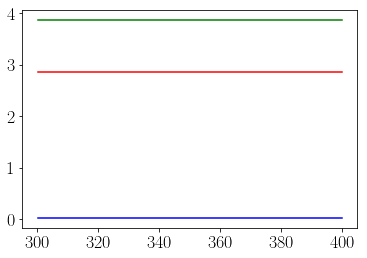

In [31]:
#Pop no tempo
alpha = 1.0
beta = 8.0
gamma = 0.5
mu = 15
m = 1

sol = np.load('IGP_without_space_m=%.2f,mu=%.2f,beta=%.2f.npy' %(m,mu,beta))

R = sol[:,0]
C1 = sol[:,1]
C2 = sol[:,2]
plt.plot(t[-1000:],R[-1000:], color = 'green')
plt.plot(t[-1000:],C1[-1000:], color = 'blue')
plt.plot(t[-1000:],C2[-1000:], color = 'red')
print R[-1]
print C1[-1]
print C2[-1]
#plt.axis([0,Tmax,0,20])

In [44]:
#Faça para vários m
alpha = 1.0
beta = 8.0
gamma = 0.5
mu = 15
m10 = 1
m20 = 5

R0,C10,C20 = 1.0,1.0,1.0
y0 = np.r_[R0,C10,C20]

M = [0 + 0.5*i for i in range(0,100)]
for m in M:
    m1 = m10 + m
    m2 = m20 + m
    sol = scipy.integrate.odeint(ddt,y0,t)
    sol = np.array(sol)
    np.save('IGP_without_space_m=%.2f,mu=%.2f,beta=%.2f' %(m,mu,beta),sol)

Text(0.5,1,u'$\\beta = 8.0,\\mu = 15.0,\\alpha = 1.0$')

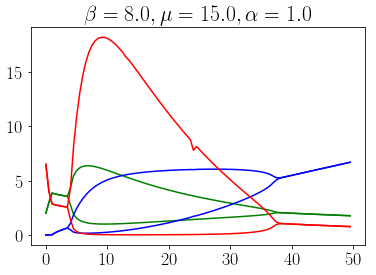

In [18]:
#Bifurcação

alpha = 1.0
beta = 8.0
gamma = 0.5
mu = 15


M = [0 + 0.5*i for i in range(0,100)]

RMAX = []
RMIN = []
C1MAX = []
C1MIN = []
C2MAX = []
C2MIN = []

for m in M:
    sol = np.load('IGP_without_space_m=%.2f,mu=%.2f,beta=%.2f.npy' %(m,mu,beta))
    R = sol[:,0]
    C1 = sol[:,1]
    C2 = sol[:,2]
    RMAX.append(np.max(R[-1000:]))
    RMIN.append(np.min(R[-1000:]))
    C1MAX.append(np.max(C1[-1000:]))
    C1MIN.append(np.min(C1[-1000:]))
    C2MAX.append(np.max(C2[-1000:]))
    C2MIN.append(np.min(C2[-1000:]))
        
plt.plot(M,RMAX,color = 'green')
plt.plot(M,RMIN,color = 'green')
plt.plot(M,C1MAX,color = 'blue')
plt.plot(M,C1MIN,color = 'blue')
plt.plot(M,C2MAX,color = 'red')
plt.plot(M,C2MIN,color = 'red')
plt.title(r"$\beta = %.1f,\mu = %.1f,\alpha = %.1f$" %(beta,mu,alpha))

In [37]:
alpha = 1.0
beta = 8.0
gamma = 0.5
mu = 15
m1 = 2
m2 = 6
fixed_points()

array([-4.1455965 ,  1.52729934, -6.1455965 ])